# Machine Learning

## [1] 데이터 로딩 & 전처리

In [57]:
# 모듈 로딩
from urllib.request import urlopen, urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.utils import all_estimators
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

FILE = 'mpg_data.csv'

In [3]:
ret=urlretrieve(URL, FILE)

In [4]:
# Logo_URL='https://search.pstatic.net/common/?src=http%3A%2F%2Fblogfiles.naver.net%2FMjAyMjA2MjZfNTAg%2FMDAxNjU2MjQ1MjUyMjQ0._gBWz3bfWYaF5BTY3_fEZzjQCac6lsNUUQWEoMflCskg.0VoxIu45jjmMUwc-csTgrcfyo4zkTGnyiwBFQuFD75gg.JPEG.smotherguy%2F1.jpg&type=a340'

In [5]:
# ret=urlretrieve(Logo_URL, 'logo.png')

In [6]:
# re(정규표현식) => \s: 화이트스페이스, +: 한 개 이상
df=pd.read_csv(URL, sep='\s+', header=None)

In [7]:
df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       398 non-null    float64
 1   1       398 non-null    int64  
 2   2       398 non-null    float64
 3   3       398 non-null    object 
 4   4       398 non-null    float64
 5   5       398 non-null    float64
 6   6       398 non-null    int64  
 7   7       398 non-null    int64  
 8   8       398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.columns = ['mpg','cylinders','displacement','horsepower','weight',
              'acceleration','model year','origin','car name']

In [10]:
# 결측치 개수 파악
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [11]:
# horsepower 컬럼 값 확인
df.horsepower.unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [12]:
# horsepower 컬럼 '?' => 결측치로 처리
df.horsepower.replace('?', np.nan, inplace=True)

In [13]:
# horsepower 컬럼 결측치 개수 파악
df.horsepower.isnull().sum()

6

In [14]:
# horsepower 컬럼 형변환
df.horsepower = df.horsepower.astype('float')
df.horsepower.fillna(df.horsepower.mean(), inplace=True)

In [15]:
# mpg 컬럼 단위 변환 => kpl  &  mpg 컬럼 삭제
df.insert(0, 'kpl', df.mpg*0.425)
df.drop('mpg', axis=1, inplace=True)

In [16]:
# 상관계수
df.corr()

,kpl,cylinders,displacement,horsepower,weight,acceleration,model year,origin
kpl,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


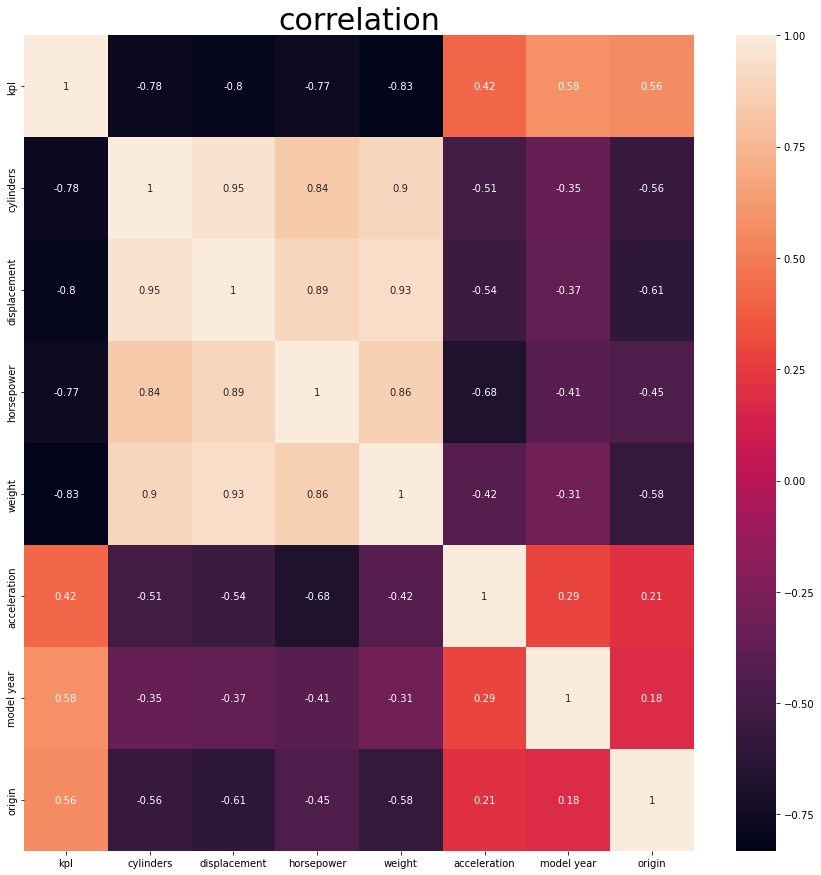

In [17]:
plt.figure(figsize=(15,15))
plt.title('correlation', fontsize=30)
sns.heatmap(df.corr(), annot=True)
plt.show()

In [18]:
# 독립변수 X: mpg
# 종속변수 y: cylinders, displacement, horsepower, weight
X = df[['cylinders', 'displacement', 'horsepower', 'weight']]
y = df['kpl']

In [19]:
# 학습에 사용할 수 있도록 형 변환
X = X.to_numpy().reshape(-1, 4)
y = y.to_numpy()

In [20]:
X.shape, y.shape

((398, 4), (398,))

## [2] 학습 & 테스트 데이터 분리

In [21]:
train_input, test_input, train_target, test_target = train_test_split(X,
                                                                     y,
                                                                     random_state=42)

## [3] 학습 & 평가

##### sklearn 모델 추천 함수 활용

In [22]:
models = all_estimators(type_filter='regressor')

In [23]:
scores = []
for name, model in models:
    try:
        # 모델 객체 생성
        md=model()
        # 학습
        md.fit(train_input, train_target)
        # 평가
        result=md.score(test_input, test_target)
        scores.append((name, np.round(result, 3)))
    except:
        pass
    
scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:245: FutureWarning: As of version 0.24, n_components(2) should be in [1, min(n_features, n_samples, n_targets)] = [1, 1]. n_components=1 will be used instead. In version 1.1 (renaming of 0.26), an error will be raised.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:132: RuntimeWarning: divide by zero encountered in true_divide
  return -2 * (y - y_pred) / self.unit_variance(y_pred)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_glm\glm.py:42: RuntimeWarning: invalid value encountered in multiply
  temp = d1 * family.deviance_derivative(y, y_pred, weights)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning: divide by zero encountered in log
  dev = 2 * (np.log(y_pred / y) + y / y_pred - 1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\_loss\glm_distribution.py:326: RuntimeWarning: divide by zero

[('ARDRegression', 0.669),
 ('AdaBoostRegressor', 0.74),
 ('BaggingRegressor', 0.758),
 ('BayesianRidge', 0.726),
 ('CCA', 0.133),
 ('DecisionTreeRegressor', 0.508),
 ('DummyRegressor', -0.0),
 ('ElasticNet', 0.727),
 ('ElasticNetCV', 0.727),
 ('ExtraTreeRegressor', 0.549),
 ('ExtraTreesRegressor', 0.785),
 ('GammaRegressor', -0.0),
 ('GaussianProcessRegressor', -8.869),
 ('GradientBoostingRegressor', 0.781),
 ('HistGradientBoostingRegressor', 0.799),
 ('HuberRegressor', 0.733),
 ('KNeighborsRegressor', 0.754),
 ('KernelRidge', -0.037),
 ('Lars', 0.726),
 ('LarsCV', 0.727),
 ('Lasso', 0.727),
 ('LassoCV', 0.727),
 ('LassoLars', -0.0),
 ('LassoLarsCV', 0.727),
 ('LassoLarsIC', 0.727),
 ('LinearRegression', 0.726),
 ('LinearSVR', -0.543),
 ('MLPRegressor', -231.927),
 ('NuSVR', 0.756),
 ('OrthogonalMatchingPursuit', 0.728),
 ('OrthogonalMatchingPursuitCV', 0.726),
 ('PLSCanonical', -1.16),
 ('PLSRegression', 0.726),
 ('PassiveAggressiveRegressor', -1.013),
 ('PoissonRegressor', -0.0),
 (

- 'HistGradientBoostingRegressor', 0.799
- 'ExtraTreeRegressor', 0.785
- 'RandomForestRegressor', 0.789

### HistGradientBoostingRegressor

In [55]:
# 모델 객체 생성
hgbr = HistGradientBoostingRegressor()

# 모델 학습
hgbr.fit(train_input, train_target)

# 모델 평가
print(f'train set score: {hgbr.score(train_input, train_target)}, \ntest set score: {hgbr.score(test_input, test_target)}')

train set score: 0.8820600227770815, 
test set score: 0.7986445848867393


### ExtraTreeRegressor

In [51]:
# 모델 객체 생성
etr = ExtraTreeRegressor()

# 모델 학습
etr.fit(train_input, train_target)

# 모델 평가
print(f'train set score: {etr.score(train_input, train_target)}, \ntest set score: {etr.score(test_input, test_target)}')

train set score: 0.9997577264433736, 
test set score: 0.578442800195747


### RandomForestRegressor

In [52]:
# 모델 객체 생성
rfr = RandomForestRegressor()

# 모델 학습
rfr.fit(train_input, train_target)

# 모델 평가
print(f'train set score: {rfr.score(train_input, train_target)}, \ntest set score: {rfr.score(test_input, test_target)}')

train set score: 0.9647244333442828, 
test set score: 0.7879770497128076


In [ ]:
# 원핫인코딩 겟더미즈?
# 사이킷런 원핫인코더?

## [4] 예측

In [67]:
import random

random.seed(42)
ran_list = [random.randint(0, len(test_input)-1) for _ in range(5)]
for ran in ran_list:
    print(f'실제값: {test_target[ran]}')
    print(f'HistGradientBoostingRegressor 예측값:{hgbr.predict(test_input[ran].reshape(1,-1))}')
    print(f'ExtraTreeRegressor 예측값: {etr.predict(test_input[ran].reshape(1,-1))}')
    print(f'RandomForestRegressor 예측값: {rfr.predict(test_input[ran].reshape(1,-1))}')
    print('')

실제값: 11.475
HistGradientBoostingRegressor 예측값:[10.85886649]
ExtraTreeRegressor 예측값: [11.475]
RandomForestRegressor 예측값: [11.424]

실제값: 10.625
HistGradientBoostingRegressor 예측값:[12.38371873]
ExtraTreeRegressor 예측값: [11.2625]
RandomForestRegressor 예측값: [11.407425]

실제값: 5.5249999999999995
HistGradientBoostingRegressor 예측값:[6.00935904]
ExtraTreeRegressor 예측값: [7.4375]
RandomForestRegressor 예측값: [6.086]

실제값: 8.075
HistGradientBoostingRegressor 예측값:[9.93133462]
ExtraTreeRegressor 예측값: [10.795]
RandomForestRegressor 예측값: [9.69255]

실제값: 6.8
HistGradientBoostingRegressor 예측값:[5.89812264]
ExtraTreeRegressor 예측값: [5.95]
RandomForestRegressor 예측값: [5.75875]



# Deep Learning

In [71]:
## 모듈 로딩
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### [1] 모델 구성

In [74]:
model = Sequential(name='DeepModel')